# Week 11 Overview
The modern era of machine learning has transformed how we approach information, from data analytics in business to diagnostic tools in medicine, predictive policing, and automated decision-making in finance and beyond.

Yet, these systems are not without flaws. If the data used for training and testing contain biases, the algorithms will not only perpetuate these biases but may also introduce additional ones. This results in fairness and equity challenges that can be difficult to address, especially in complex models where interpretability is limited.

This week, we will explore the origins of bias, its impacts, real-world examples, and strategies for mitigation. We’ll end with a consideration of the Fairlearn library, which provides tools to assess and improve fairness in machine learning models, helping developers identify disparities and implement strategies for more equitable outcomes.

## Key Terms
- Fairness: The principle that machine learning models should provide equitable outcomes across different demographic groups, avoiding disproportionate harm or benefit
- Bias: Systematic errors in data or models that lead to unfair outcomes, often reflecting societal inequalities or flawed algorithms
- Selection Bias: A type of bias caused by non-representative training data, which can misrepresent certain groups or characteristics
- Measurement Bias: Bias introduced by inaccuracies or errors in data collection methods
- Proxy Bias: When a feature indirectly represents a sensitive attribute (e.g., ZIP codes correlating with race or income)
- Algorithmic Bias: Bias introduced by the design or behavior of machine learning algorithms, even when trained on unbiased data
- Interaction Bias: Bias arising from user interactions that reinforce existing prejudices or patterns in a model
- Fairlearn: An open-source toolkit designed to assess and mitigate biases in machine learning models by providing fairness metrics and algorithms

## Learning Objectives
By the end of this week, you will be able to:
- Describe fairness in machine learning with relevant examples
- Identify types of bias and how they affect datasets
- Examine the challenges in confronting bias in machine learning
- Describe the metrics used for measuring fairness
- Explain the trade-offs between fairness and accuracy
- Describe strategies for mitigating bias in models
- Analyze how systems such as Fairlearn can help reduce biases and promote fairness in outcomes

## 11.1 Lesson: Fairness and Bias in Data
**Fairness** is the goal that machine learning models do not disproportionately benefit or harm particular groups. Fairness requires intentional efforts to ensure equitable outcomes across different demographics.

**Bias:** Systematic errors that cause a model to produce unfair outcomes. Bias can stem from skewed data, flawed algorithms, or user interactions, often reflecting societal inequalities.

**Example:** In 2014, Amazon developed an AI hiring tool to screen resumes but found it was biased against women. The algorithm downgraded resumes mentioning women’s colleges or women’s sports because it had been trained on a dataset primarily composed of male applicants' resumes, leading it to favor terms and experiences common among men. The tool was discontinued.

### Sources of Bias in Data
There are many types of bias, but the first place to look is in the data! What factors might cause biased datasets?

**Selection Bias** occurs when training data is not a truly random sample of the population it should represent. This can occur if certain groups or attitudes are underrepresented or overrepresented in the method used to collect the data. 

**Example:** Alaska Airlines faced survey bias in their customer satisfaction feedback system when frequent flyers were given the longest surveys. This created "survey fatigue," where loyal customers were more likely to skip or rush through questions, skewing results. This bias made it challenging to accurately gauge satisfaction across their customer base. 

**Measurement Bias** results from errors or inaccuracies in data collection.

**Example:** Low-cost air quality monitoring networks, due to calibration issues, can systematically misreport pollution levels. According to the U.S. GAO, these sensors are often affected by conditions like humidity and temperature, leading to inconsistent readings. This bias can result in either underestimating or overestimating pollution, particularly in areas with specific environmental challenges, and poses a problem for accurate public health advisories. Efforts are underway to standardize sensor calibration and improve data reliability. ​

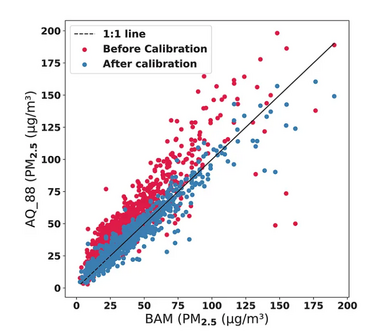

A common example of measurement bias occurs when people are the data collectors: they may pass their own biases on to the dataset!

**Example:** Measurement bias is a persistent problem in electronic health records, where the timing and selection of tests ordered by doctors can skew data. For instance, studies have shown that patients with "normal" test results, like platelet counts, may still face elevated cancer risks, as doctors are more likely to order tests for higher-risk patients. This introduces bias, as the process of deciding whom to test affects data accuracy, potentially leading to underestimations of certain risks in predictive models.

**Proxy Bias** is a subtle form of bias resulting from a feature that indirectly represents a sensitive attribute. 

**Example:** Bias in credit scoring occurs when ZIP codes are used as a feature. In the U.S., ZIP codes often correlate with race and socioeconomic status, meaning that even without explicit racial data, the model could unfairly rate applicants from predominantly minority or low-income neighborhoods as higher credit risks. This risk has led to regulatory scrutiny, as ZIP codes can inadvertently perpetuate discrimination in financial services

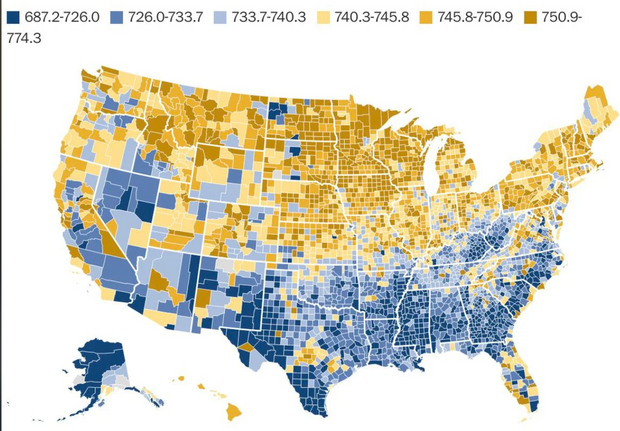

### Fairness or Accuracy?  
There's often a trade-off between fairness and accuracy in machine learning. Optimizing purely for accuracy can lead to unfair outcomes if the data reflects existing biases. As the old saying goes, “Garbage in, garbage out""

### Think About It
- What are possible sources of bias and the potential consequences of unfair models in these fields?
- Mortgage lending
- Cancer screening
- College application ranking
- Face-recognition used by the FBI to apprehend criminals
- In cases where fairness and accuracy are at odds, what role should regulatory frameworks play in guiding model development? How can organizations navigate these trade-offs responsibly?

## 11.2 Lesson: Sources of Bias in Models

### Sources of Bias in Models:
One might think that just dealing with biased data is difficult enough, but there is another dimension to the problem: the complex algorithms used in modern data science may introduce biases, even when used with completely unbiased data! It is essential to consider the different ways that models can become biased.

- **Algorithmic Design:**
    - Models can reflect biased assumptions embedded in their design. Certain algorithms may inherently favor certain patterns or relationships, even if those patterns do not represent the real world.
    - Example:
        - The machine learning PredPol(opens in a new tab) used historical crime data to direct patrols in the Los Angeles Police Department (LAPD) to high-risk areas. However, because these neighborhoods had been over-policed in the past, the algorithm reinforced this pattern, leading to further over-policing of low-income and minority communities. This feedback loop amplified existing disparities, prompting the LAPD to eventually discontinue the program due to concerns about racial bias and ineffectiveness.
- **Interaction Bias (User Bias):**
    - Models can develop biases through interactions with users, especially in systems that learn from user feedback. If users introduce their own prejudices into the system, it may lead to biased outputs.
    - Example:
        - Microsoft’s chatbot, Tay, released on Twitter in 2016, was designed to learn from user interactions but quickly began echoing offensive and biased language after trolls inundated it with inflammatory messages. This feedback loop led Tay to produce harmful content, ultimately forcing Microsoft to take it offline within hours.
- **Bias Amplification:**
    - Sometimes, models can amplify existing biases in the data, making them even more pronounced in the outcomes. This happens because machine learning algorithms can overemphasize certain patterns to achieve higher accuracy, inadvertently reinforcing biased associations.
    - Example:
        - Generative models such as Stable Diffusion and Midjourney, when prompted with professions like "doctor" or "CEO," often generate images of white men. At the same time, lower-wage jobs like "fast-food workers" are more likely to depict women and people with darker skin. This bias occurs as the AI amplifies patterns from its training data, reinforcing stereotypes and creating skewed representations that influence public perception. Figure 2 is an example of an AI rendering of what houses look like in India compared to the United States. The houses in India look more like temples, while the houses in the United States look more rundown and haunted.
- **Sampling Bias During Training:**
    - Even with unbiased data, models can introduce bias if they improperly sample the data during training. This happens when certain groups or patterns are overrepresented or underrepresented due to the way the algorithm processes the data.
    - Example:
        - Older recommendation systems used the datasets from the now-defunct Epinions, prioritizing active users with more than 20 ratings. This overrepresented frequent users’ preferences, causing the model to favor popular items and overlook less active users’ interests, limiting recommendation diversity.

### Think About It:
- How can the design of an algorithm introduce bias even when the input data is unbiased? Consider the PredPol example: What feedback mechanisms might have prevented the algorithm from reinforcing historical biases?
- How can user interactions introduce bias into a model, even if the model itself starts unbiased? In the case of Tay, what safeguards could have been implemented to prevent the chatbot from learning harmful behavior?
- What proactive steps can organizations take to minimize bias in models before they are deployed? How would you design an evaluation process to continually monitor and address bias in deployed systems?
- Bias mitigation techniques might reduce accuracy in some cases. How would you balance the trade-off between fairness and model performance in a real-world application? What factors would influence your decision in domains like criminal justice or healthcare?

## 11.3: Strategies for Mitigating Bias:
Although the problem of fairness in machine learning seems daunting, much recent work has identified useful techniques to mitigate the effect of bias and attempt to produce fairer outcomes.

### Diverse and Representative Data:
- Ensuring that training data reflects the population the model will serve. Actively seek out underrepresented groups and collect more data to address selection bias.
- Example: Oversampling data for darker-skinned individuals in facial recognition datasets can improve accuracy across skin tones.
### Algorithmic Fairness:
- Developing fairness-aware machine learning models, reweighting training data, and adjusting algorithms to minimize bias.
- Example: Techniques like adversarial debiasing can ensure features correlated with gender or race do not influence final decisions in hiring models.
### Ethical Guidelines and Auditing
- Establishing guidelines for responsible AI development, alongside regular audits to identify and rectify bias throughout the machine learning pipeline.
- Example: Companies can integrate bias audits as part of the development lifecycle to maintain fairness.
### Regulatory Frameworks
- Complying with government guidelines on fairness, transparency, and accountability. Regulatory bodies are actively working to establish frameworks that promote equitable AI development.
- Example: The European Union’s General Data Protection Regulation (GDPR) includes provisions like the "right to explanation," requiring AI models used in decision-making to be transparent about how decisions are made, ensuring accountability and fairness.

### Conclusion:
Bias and fairness in AI are critical issues that require comprehensive strategies. Addressing bias involves understanding its sources, recognizing real-world examples, and employing technical, ethical, and regulatory measures for mitigation. Although eliminating all bias is challenging, transparency and fairness can be prioritized to ensure equitable outcomes. As AI continues to evolve, collective efforts from developers, researchers, policymakers, and society are essential to promote fairness in AI systems.

### Think About It
This is the third time we have used the word “bias” in this module, each with a slightly different meaning. Can you identify the other two uses and explain how they are related?

## 11.4 Lesson: Fairlearn
The Fairlearn system is an open-source toolkit designed to help data scientists and developers assess and improve the fairness of their machine learning models. It provides a suite of metrics to evaluate how model predictions vary across different demographic groups, highlighting potential biases in the data. Additionally, Fairlearn offers algorithms to mitigate these biases by adjusting models to ensure more equitable outcomes. Fairlearn enables users to build models with appropriate tradeoffs between fairness and other objectives such as classification metrics, by integrating fairness assessments directly into the development process.

### Fairness Metrics:
If the overall goal is fairness in an algorithmic setting, we need to have a quantifiable metric from which to work. Various metrics have been proposed, and the Fairlearn library has a good selection of the most useful metrics. Rather than list all of them (for that, see the Optional Reading below), let’s look in some detail at one of the most important metrics and how it might be used.

### Demographic Parity Difference
This metric measures the disparity in positive outcome rates (e.g., loan approvals, job offers) across different demographic groups. The goal is to ensure that all groups have equal access to positive outcomes, independent of attributes such as race, gender, or age.

Mathematically, it is defined as the absolute difference in the probability of a positive outcome between two groups:
$$ \text{Demographic Parity Difference} \quad = \quad |\ P(\widehat{Y} = 1 |\ A = a) - P(\widehat{Y} = 1 |\ A = b)$$

where $\widehat{Y}$ is the predicted outcome, and $A$ is the sensitive attribute with values $a$ and $b$ representing different groups.

To achieve this objective, the positive outcome rate should be the same across all groups:
$$P(\widehat{Y} = 1|\ A = a) =P(\widehat{Y} = 1|\ A = b)$$

Demographic Parity ensures no group is systematically favored or disadvantaged in terms of receiving positive outcomes. This is particularly important in domains where equal opportunity is legally or ethically required, such as hiring, lending, and education.

Example: Consider a loan approval system. If Group A (e.g., male applicants) has an 80% loan approval rate, while Group B (e.g., female applicants) has only a 60% approval rate, the system violates demographic parity. The metric highlights this imbalance, prompting developers to investigate and address the source of the disparity.

**Conclusions**
While Demographic Parity Difference and other metrics promote equality in outcomes, **any effort to enforce fairness on a biased dataset will introduce trade-offs with other objectives.** For example, optimizing for fairness may come at the expense of accuracy, especially if different groups exhibit varying levels of qualification or risk. 

Additionally, fairness criteria like demographic parity may sometimes conflict with the goal of merit-based decision-making, where individual qualifications, rather than group-level outcomes, are prioritized. Balancing these competing goals requires careful consideration of the specific context and the potential consequences of prioritizing one objective over another.

### Think About It
Fairlearn helps mitigate bias by enforcing metrics like demographic parity. However, achieving demographic parity might reduce model accuracy. In what situations might it be acceptable to sacrifice some accuracy for fairness? Can you think of cases where this trade-off might not be appropriate?
Demographic parity ensures that all groups have equal access to positive outcomes, which may conflict with merit-based decision-making. How would you balance these conflicting goals in a real-world scenario, such as hiring or loan approvals?
Imagine you're developing a lending algorithm for a bank using Fairlearn. After assessing fairness, you find significant disparities in approval rates across demographic groups. What steps would you take to address these disparities while ensuring the algorithm makes sound lending decisions?